# Autoencoder

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.datasets import mnist

import sys
sys.path.append('../src/')
from adv_autoencoder import AAE

import matplotlib.pyplot as plt
import random
import util
import datetime
from math import ceil

In [11]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = '../logs/gradient_tape/' + current_time + '/train'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
train_summary_writer.set_as_default()

## Load MNIST data and create dataset

In [9]:
BATCHSIZE = 400
DATASET_REPS = 100

(X_train, label_train), _ = mnist.load_data()
X_train = tf.cast(X_train, tf.float32) / 255
n_data = X_train.shape[0]
dataset = tf.data.Dataset.from_tensor_slices(X_train)
dataset = dataset.shuffle(n_data) # TODO redo shuffling in proper location?
dataset = dataset.batch(BATCHSIZE)
dataset = dataset.repeat(DATASET_REPS)
n_batch = ceil((n_data/BATCHSIZE)*DATASET_REPS)
print(f"DATASET SIZE: {n_data}\nBATCHSIZE: {BATCHSIZE}\nDATASET REPS: {DATASET_REPS}")

DATASET SIZE: 60000
BATCHSIZE: 400
DATASET REPS: 100


In [4]:
model = AAE()
autoencoder_optimizer = tf.keras.optimizers.SGD(lr=1e-5)
discriminator_optimizer = tf.keras.optimizers.SGD(lr=1e-7)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



## Train Model

In [12]:
model.fit(dataset, BATCHSIZE, autoencoder_optimizer, discriminator_optimizer, train_summary_writer)

15000it [05:20, 46.85it/s]


## Example Reconstructions

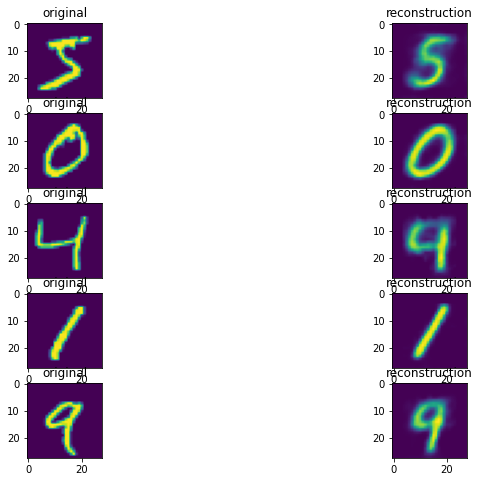

In [13]:
X = X_train[:5,:,:,None]
Z, R = model(X)
reconstruction = R.numpy()

fig = util.plot_reconst(X, reconstruction)
plt.show()

## Latent Space

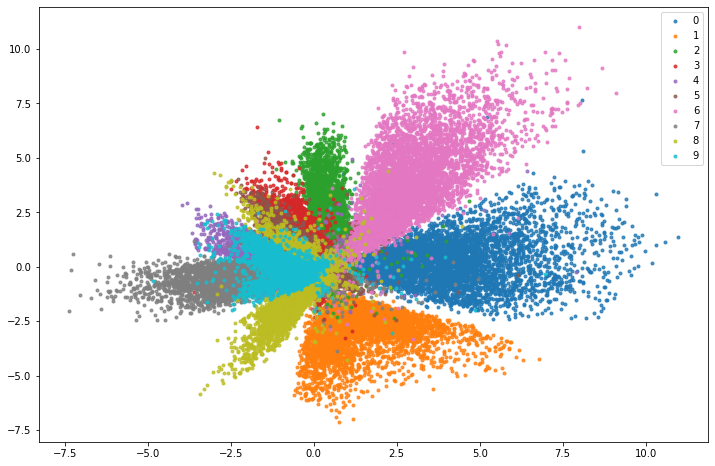

In [14]:
Z, _ = model(X_train[:,:,:,None])
Z = Z.numpy()
fig = util.plot_latent_space(Z, label_train)
plt.show()